# 2A.eco - Mise en pratique des séances 1 et 2 - Utilisation de pandas et visualisation - correction

Correction de l'exercice 3 et disponibilités des velibs.

In [1]:
%matplotlib inline

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [4]:
from pyensae.datasource import download_data
files = download_data("td2a_eco_exercices_de_manipulation_de_donnees.zip",
                      url="https://github.com/sdpython/ensae_teaching_cs/raw/master/_doc/notebooks/td2a_eco/data/")
files

['.\\Players_WC2014.xlsx',
 '.\\velib_t1.txt',
 '.\\velib_t2.txt',
 '.\\villes.txt']

## Exercice 3 - Disponibilité des vélibs

Durée : 30 minutes

1. Importer les données sous la forme d'un dataFrame 

    - `velib_t1.txt` - avec les données des stations à un instant $t$
    - `velib_t2.txt` - avec les données des stations à un instant $t + 1$

2. Représenter la localisation des stations vélib dans Paris

    - représenter les stations en fonction du nombre de places avec un gradient

3. Comparer pour une station donnée l'évolution de la disponibilité (en fusionnant les deux bases $t$ et $t+1$)

    - représenter les stations qui ont connu une évolution significative (plus de 5 changements) avec un gradient de couleurs 

In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt

Importer le fichier sous forme d'un dataframe

In [7]:
with open("velib_t1.txt") as f:
    dic = json.load(f)
df = pd.DataFrame.from_dict(dic)
df.head(n=2)

,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,name,number,position,status
0,RUE DES CHAMPEAUX (PRES DE LA GARE ROUTIERE) -...,47,3,True,50,True,Paris,1442932668000,31705 - CHAMPEAUX (BAGNOLET),31705,"{'lat': 48.8645278209514, 'lng': 2.41617072442...",OPEN
1,52 RUE D'ENGHIEN / ANGLE RUE DU FAUBOURG POISS...,0,33,True,33,False,Paris,1442932457000,10042 - POISSONNIÈRE - ENGHIEN,10042,"{'lat': 48.87242006305313, 'lng': 2.3483952362...",OPEN


Tracer la latitude et la longitude (elles sont dans un dico : il faut les récupérer)

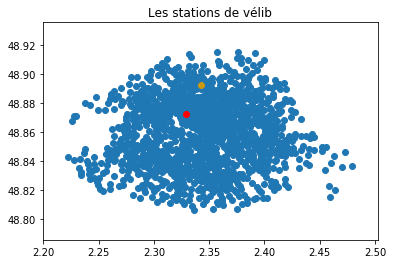

In [9]:
df['lat']=df['position'].map(lambda x : x['lat'])
df['lng']=df['position'].map(lambda x : x['lng'])
plt.scatter(df.lng, df.lat) 
plt.scatter(2.342529,48.892931, color="#CA9912") # Maison
plt.scatter(2.329119,48.872243,  color="r") #Bureau
plt.title("Les stations de vélib")
#plt.show()

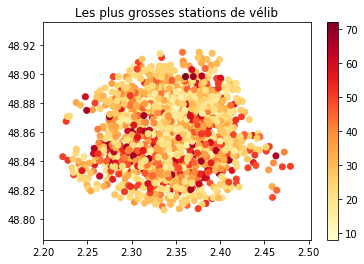

In [11]:
plt.scatter(df.lng, df.lat, c=df.bike_stands, cmap="YlOrRd") 
plt.colorbar()
plt.title("Les plus grosses stations de vélib")

In [13]:
import json
import pandas as pd


file = 'velib_t2.txt'
with open(file) as file_stations_t2:
    data_stations_t2 = json.loads(file_stations_t2.read())

df_stations_t2 = pd.DataFrame(data_stations_t2)
liste_stations = df_stations_t2['number'].tolist()

In [14]:
evolutions_stations = pd.merge(left = df, right = df_stations_t2,   on = 'number')  
evolutions_stations.columns

Index(['address_x', 'available_bike_stands_x', 'available_bikes_x',
       'banking_x', 'bike_stands_x', 'bonus_x', 'contract_name_x',
       'last_update_x', 'name_x', 'number', 'position_x', 'status_x', 'lat',
       'lng', 'address_y', 'available_bike_stands_y', 'available_bikes_y',
       'banking_y', 'bike_stands_y', 'bonus_y', 'contract_name_y',
       'last_update_y', 'name_y', 'position_y', 'status_y'],
      dtype='object')

In [16]:
evolutions_stations = evolutions_stations[['address_x', 'number',
                                           'available_bike_stands_x','available_bike_stands_y','lng','lat']]

evolutions_stations['variation'] = evolutions_stations['available_bike_stands_x'] - \
                                    evolutions_stations['available_bike_stands_y']

In [17]:
lng_var = evolutions_stations[evolutions_stations['variation']>5]["lng"].tolist()
lat_var = evolutions_stations[evolutions_stations['variation']>5]["lat"].tolist()
valeurs = evolutions_stations[evolutions_stations['variation']>5]["variation"].tolist()
labels = evolutions_stations[evolutions_stations['variation']>5]["address_x"].tolist()

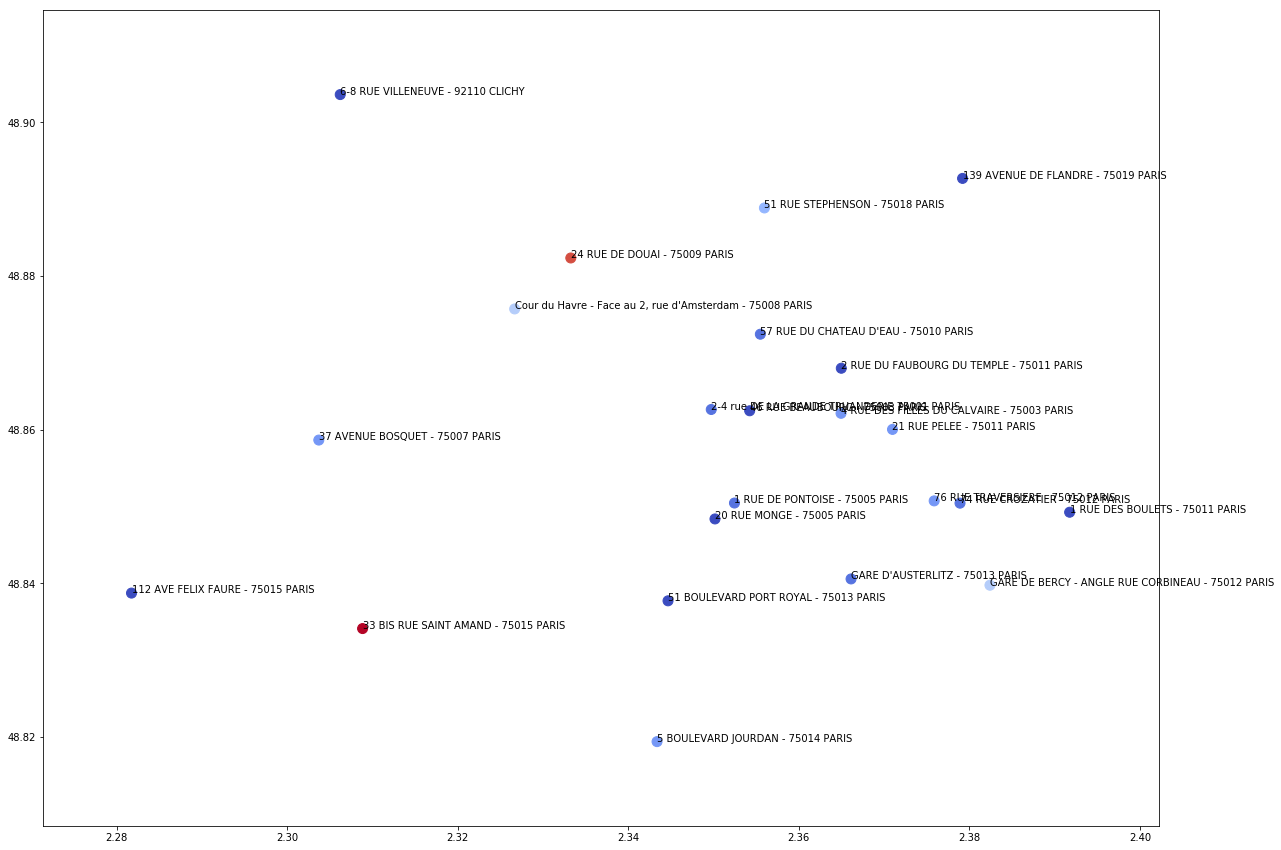

In [18]:
lng_var = evolutions_stations[evolutions_stations['variation']>5]["lng"].tolist()
lat_var = evolutions_stations[evolutions_stations['variation']>5]["lat"].tolist()

valeurs = evolutions_stations[evolutions_stations['variation']>5]["variation"].tolist()

labels = evolutions_stations[evolutions_stations['variation']>5]["address_x"].tolist()
scaled_z = []
for value in valeurs : 
    scaled_z.append((value - min(valeurs)) / (max(valeurs) - min(valeurs)))
    
colors = plt.cm.coolwarm(scaled_z)

fig = plt.figure(figsize=(20,15))

for label, x, y in zip(labels, lng_var, lat_var):
    plt.annotate(label, xy = (x, y),)

plt.scatter(x = lng_var , y = lat_var, c = colors, marker = "o", s = 100)

In [20]:
valeurs

[17, 10, 6, 6, 10, 7, 8, 6, 8, 16, 6, 7, 9, 8, 7, 7, 6, 6, 6, 8, 8, 6, 7]